# Problems Jupyter Notebook

## Problem 1: Extending the Lady Tasting Tea

<p align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTD4bu4pFuN6_5dkXH5gfJ95SB-g4xMekkrog&s" 
       alt="The Lady Tasting Tea Cartoon" width="400">
</p>

### Objective: 
_Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first._ More infomration on the experiment can be found [Here](https://en.wikipedia.org/wiki/Lady_tasting_tea)

_Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment._

_In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design._

In [1]:
# Import libraries that will be used:
import math
import numpy as np
import matplotlib.pyplot as plt

- [Math documentation including how `math.comb` works](https://docs.python.org/3/library/math.html)  
- [Numpy documentation covering and including `np.random` `np.array`](https://numpy.org/doc/2.1/reference/module_structure.html)


In [2]:
# Set up out our variables:
# Total number of cups
num_cups = 12
# Number of tea first
num_tea = 8
# Number of milk first
num_milk = 4

Using `math.comb(n, k)` to calculate combinations.
Interstingly, as we have by guessing the number of milk first cups correctly, we automatically know the number of tea first cups correctly as well. Therefore we only need to calculate one side of the combination. It would not make sense to select the number of tea first cups, however we will explore the alternative to see if it makes a difference.


In [3]:
# math.comb(n, k) calculates the number of combinations of n items taken k at a time.
ways = math.comb(num_cups, num_milk)
ways


495

Therefore above one can see that the total number of ways to correctly guess which cups had milk added first is 495. An increase from the original experiment from Fisher of 70.
Using a labelling and placeholder system comparing to the original problem we see that the number of placeholders does not change just the number of labelled cups:

Original problem (8 cups of tea 4 milk first 4 tea first)
Cup labels: `1` `2` `3` `4` `5` `6` `7` `8`
Placeholders: `_` `_` `_` `_`

New problem (12 cups of tea 4 milk first 8 tea first)
Cup labels: `1` `2` `3` `4` `5` `6` `7` `8` `9` `10` `11` `12`
Placeholders: `_` `_` `_` `_`

In [4]:
# If the order of the cups mattered it would result in:
order_ways = 12*11*10*9
order_ways

11880

We can see in the above that as we increase the number of cups if selecting from 12 cups in 4 places and the order is critical that there is a 1/11880 chance of it being correct. However in this situation we do not care about the order therefore we can disregard ordering.

In [5]:
# Ways to shuffle our placeholders:
shuffles = 4*3*2*1
shuffles


24

In [6]:
# Therfore the number of combinations is:
num_combs= order_ways // shuffles
num_combs

495

Therefore one can see that the num_combs = ways

What if we look at the alternative does it change the number of combinations?
New problem (12 cups of tea 4 milk first 8 tea first)   
Cup labels: `1` `2` `3` `4` `5` `6` `7` `8` `9` `10` `11` `12`  
Placeholders: `_` `_` `_` `_` `_` `_` `_` `_`  


In [7]:
way_alt = math.comb(num_cups, num_tea)
way_alt

495

It appears that regardless of whether we are looking to identify the tea first or the milk first the number of combinations excluding a need for order are the same.  
For completeness lets do the maths using the increased number of placeholders as if the lady is identifying the tea first cups. 

In [8]:
# Using the same logic previously lets do calculations and compare
order_ways_alt = 12*11*10*9*8*7*6*5
order_ways_alt 

19958400

A much higher number of order ways do to their being more placeholders. We also will have a higher number of shuffles that we can do.

In [9]:
shuffles_alt = 8*7*6*5*4*3*2*1    
shuffles_alt

40320

Also a larger number due to the larger number of places for the cups of tea to be place in. This should result in the the same number of combinations 


In [10]:
num_combs_alt = order_ways_alt // shuffles_alt
num_combs_alt

495

The reason as to why selecting the milk first or tea first is irrelevant to the probability is due to the selection being complementary events. Successful selection of the milk first tea decides the tea first and vice versa. More can be read about it here [statistics how to article](https://www.statisticshowto.com/complementary-events/). 

Now that we know there are 495 combinations that can happen across the 12 cups of tea lets use `Numpy` to perform some simulations look at probabilities and compare to the original problem.

In [11]:
# Make a numpy array of the 12 cups with cups 0 to 3 are the milk first cups and cups 4 to 11 are the tea first cups
cups = np.arange(12)
milk_first = cups[:4]
tea_first = cups[4:]
milk_first, tea_first, cups

(array([0, 1, 2, 3]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

Now that we have our cups in an array next we can use `np.random.shuffle(cups)` to simulate random selection.

In [12]:
np.random.shuffle(cups)
cups

array([11,  6,  2,  3, 10,  9,  7,  1,  4,  8,  5,  0])

However as I used indexing to determine the milk first and tea first cups I need to come up with another way of identifying the cups.

In [13]:
milk_first = cups[cups <= 3]
tea_first = cups[cups > 3]
milk_first.sort()
tea_first.sort()
milk_first, tea_first

(array([0, 1, 2, 3]), array([ 4,  5,  6,  7,  8,  9, 10, 11]))

We can now see that our cups if we imagine them in a line are no longer all 4 milk first followed by all 8 tea first cups. Next we can use `np.random.choice()` to simulate the lady selecting the 4 milk first tea cups. We have already seen it doesn't effect the combinations if she selects the tea first or milk first so for simplicity we will assume that she would select the milk first cups as there are less of them. 

In [14]:
# We are not replacing the cups so we set replace=False
selection = np.random.choice(cups, size=4, replace=False)
# Sort the selection to make it easier to read and to compare
selection.sort()
selection

array([ 1,  3,  5, 10])

This works for one execution of the experiment and we can keep running the above cell to see if we can get the ladies desired result of [0, 1, 2, 3]. Let's scale this to a full blown experiment and track the results. 

In [15]:
# Running the expierment 100,000 times to see how often the lady selects all 4 milk first cups
attempts = 1000
successes = 0
for _ in range(attempts):
    selection = np.random.choice(cups, size=4, replace=False)
    selection.sort()
    if np.array_equal(selection, milk_first):
        successes += 1
success_rate = successes / attempts
success_rate

0.004

After simulating the above multiple times I keep returning a los success_rate of so lets modify it to get the experiment to run until we get a correct selection and record how many attempts that takes.


In [16]:
cups, milk_first

(array([11,  6,  2,  3, 10,  9,  7,  1,  4,  8,  5,  0]), array([0, 1, 2, 3]))

In [17]:
attempts = 0
while True:
    attempts += 1
    selection = np.random.choice(cups, size=4, replace=False)
    selection.sort()
    if np.array_equal(selection, milk_first):
        break
    attempts
attempts_needed = attempts
success_rate_experimental = 1/attempts_needed 
attempts_needed, success_rate_experimental

(48, 0.020833333333333332)

We can see that in the experiment of attempts and running the experiment until the lady selects the correct number of cups are both showing a success rate of approximately 0.002 or 0.2%. Remember we calculated that using `math.comb()` and got $1 \div 495 \approx 0.2 %$ thus showing that the experiment is quite close to what we would expect. 


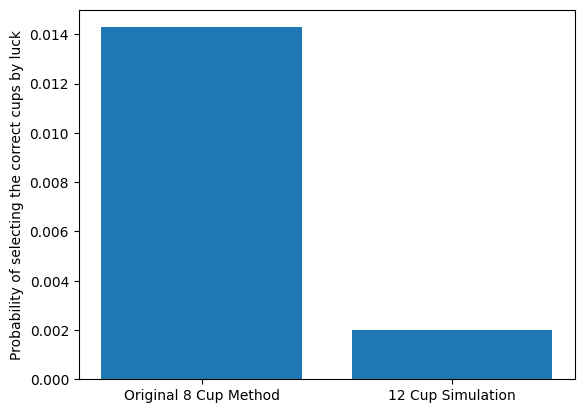

In [18]:
x_values = ['Original 8 Cup Method', '12 Cup Simulation']
y_vlaues = [1/70, 1/495]
plt.bar(x_values, y_vlaues)
plt.ylabel('Probability of selecting the correct cups by luck')
plt.show()

We can observe that increasing the cups from 8 to 12 greatly reduces the probability of being able to correctly guess the outcome. 
The difference is approximately $0.14-0.002 \approx 0.012$ or $\frac{0.012}{0.14} = 0.857$ $\approx$ 86%  reduction in probability.

Looking at all the probabilities of selecting each cup correctly by chance in both the 8 cup and 12 cup scenario.

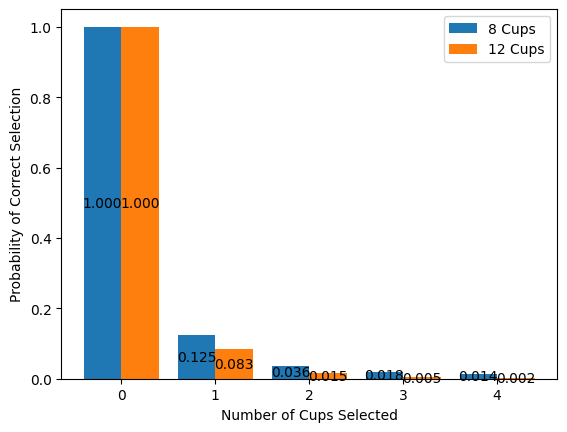

In [23]:
original_cups = 8
extended_cups = 12
cup_count = 0
y_original = []
y_extended = []
while cup_count <= 4:
    ways_original = 1/math.comb(original_cups, cup_count)
    ways_extended = 1/math.comb(extended_cups, cup_count)
    y_original.append(ways_original)
    y_extended.append(ways_extended)
    cup_count += 1

x = [0, 1, 2, 3, 4]

fig, ax = plt.subplots()

bars1 = ax.bar([i - 0.2 for i in x], y_original, width=0.4, label='8 Cups')
bars2 = ax.bar([i + 0.2 for i in x], y_extended, width=0.4, label='12 Cups')

ax.set_xlabel('Number of Cups Selected')
ax.set_ylabel('Probability of Correct Selection')
ax.legend()

ax.bar_label(bars1, label_type='center', fmt='%.3f')
ax.bar_label(bars2, label_type='center', fmt='%.3f')
plt.show()


We can ignore the number of cups selected as 0 as if we think about it there is only one way to select 0 from 8 or 12 cups and that is to select nothing at all and $ \frac{1}{1}$ = 1 or 100% 

Note to Andre to keep looking at this and discuss hypothesis testing and the p values 

## Problem 2: Normal Distribution
<p align="center">
  <img src="https://i.ytimg.com/vi/MqBR7RYFSas/maxresdefault.jpg" 
       alt="The Lady Tasting Tea Cartoon" width="800">
</p>

### Objective: 
_Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased._

## Problem 3: t-Tests
### Objective: 
_A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times_

_1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1._

_2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05._ 

_3. Record the proportion of times the null hypothesis is not rejected._

_Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases._

## Problem 4: ANOVA
### Objective: 
_Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1._

_1. Perform a one-way ANOVA to test whether all three means are equal._  
_2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3._  
_3. Compare the conclusions._  

_Write a short note on why ANOVA is preferred over running several t-tests._

### References:
- A very helpful github guide on `markdown` used throughout for all markdown formatting [here](https://github.com/adam-p/markdown-here/wiki/markdown-cheatsheet)

## END